In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dog_barking_7.wav to dog_barking_7.wav
Saving LION_ROARING_GrY.wav to LION_ROARING_GrY.wav
User uploaded file "dog_barking_7.wav" with length 142800 bytes
User uploaded file "LION_ROARING_GrY.wav" with length 931718 bytes


In [3]:

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import time

def extract_features(file_path):
    try:
        # Start the timer
        start_time = time.time()

        audio, sr = librosa.load(file_path, sr=None, duration=5) # Load only the first 5 seconds

        # Check if the audio is loaded successfully
        if audio.size == 0:
            print(f"Warning: Could not load audio from {file_path} or it is shorter than 5 seconds.")
            return np.zeros((13, 1)) # Return an empty array to prevent errors

        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

        # Stop the timer and print the elapsed time
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Time to extract features from {file_path}: {elapsed_time} seconds")

        return mfccs
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return np.zeros((13, 1)) # Return an empty array to prevent errors

# Assuming 'lion.wav' and 'horse.wav' are uploaded
lion_path = 'LION_ROARING_GrY.wav' # Replace with your actual file name
horse_path = 'dog_barking_7.wav' # Replace with your actual file name


lion_mfccs = extract_features(lion_path)
horse_mfccs = extract_features(horse_path)

#Combining features for clustering
if lion_mfccs.shape[1] > 0 and horse_mfccs.shape[1] > 0: # Check if the MFCCs were extracted successfully
    features = np.concatenate((lion_mfccs, horse_mfccs), axis=1).T
    print("Features combined successfully")
else:
    print("Error combining features. One or both audio files were not processed correctly.")
    features = np.zeros((1, 13)) # Handle cases where no features are extracted


Time to extract features from LION_ROARING_GrY.wav: 14.383524417877197 seconds
Time to extract features from dog_barking_7.wav: 0.009361743927001953 seconds
Features combined successfully


In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_features)
labels = kmeans.labels_

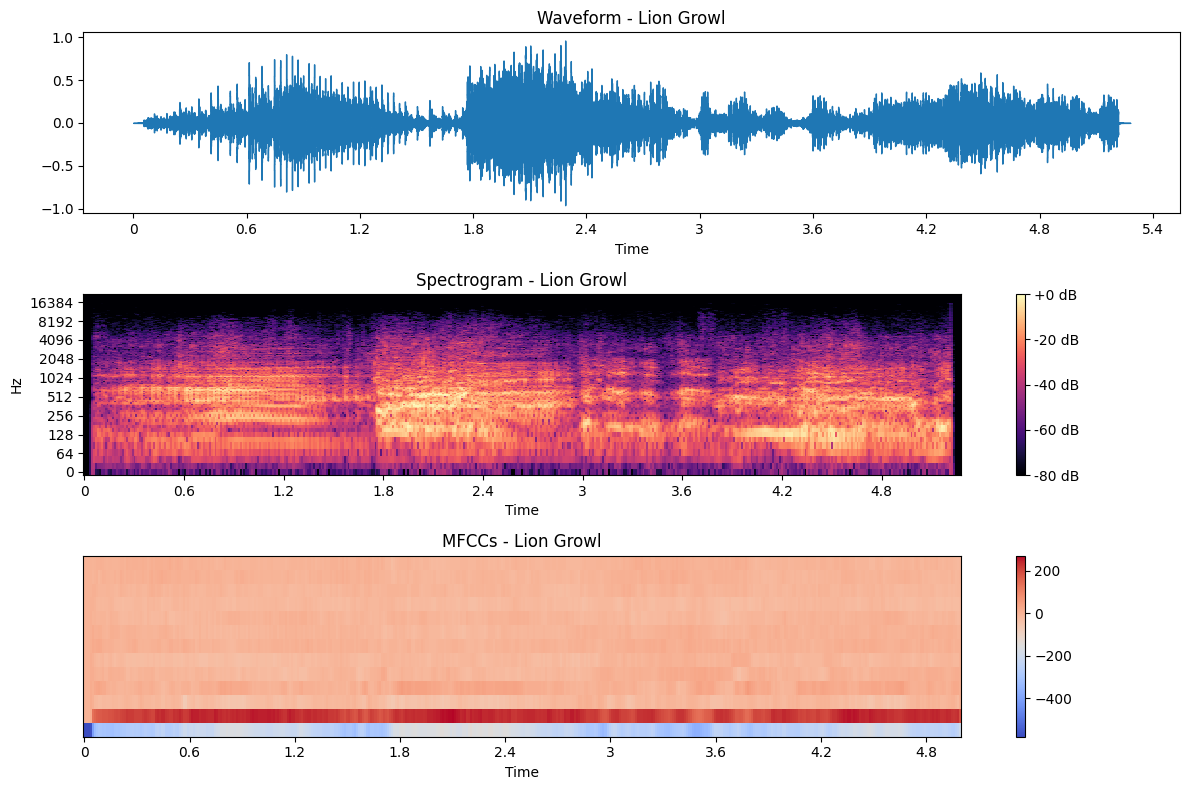

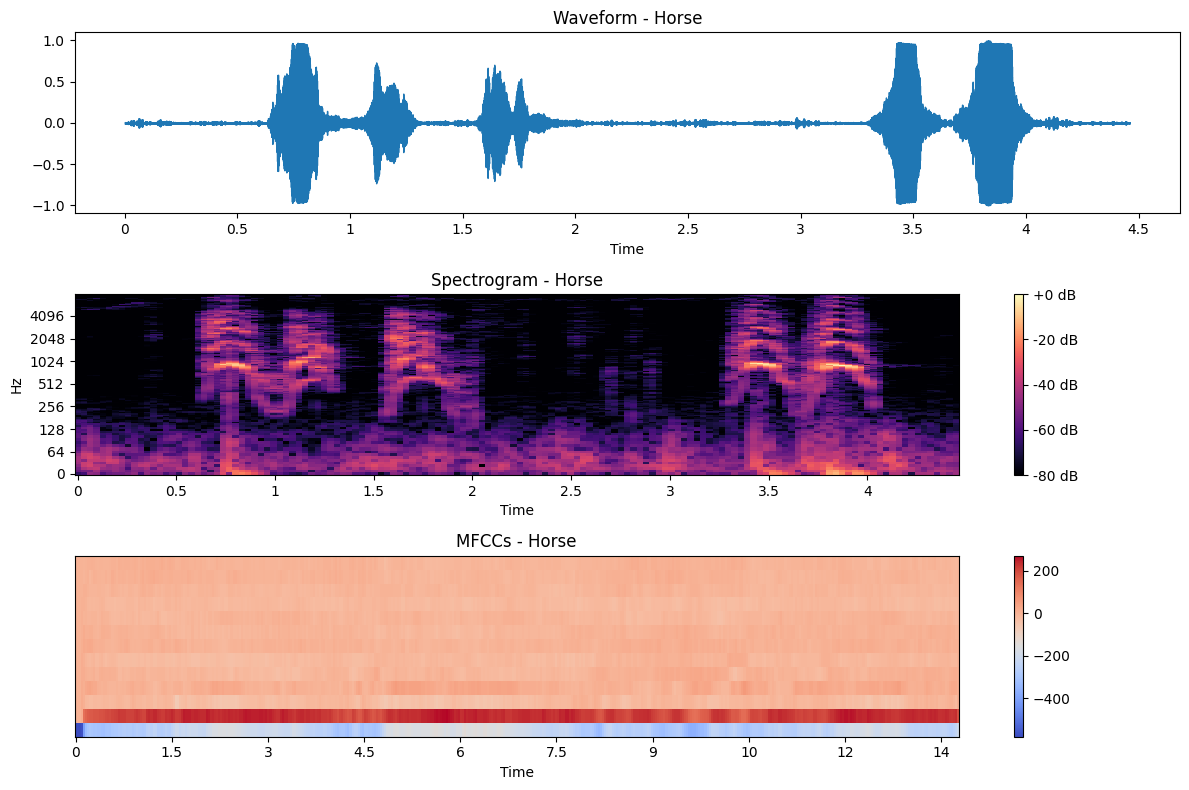

In [6]:
def plot_audio_analysis(file_path, title):
    audio, sr = librosa.load(file_path, sr=None)

    # Plotting Waveform
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    librosa.display.waveshow(audio, sr=sr)
    plt.title(f'Waveform - {title}')

    # Plotting Spectrogram
    plt.subplot(3, 1, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - {title}')

    # Plotting MFCCs
    plt.subplot(3, 1, 3)
    librosa.display.specshow(lion_mfccs, sr=sr, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCCs - {title}')
    plt.tight_layout()
    plt.show()

plot_audio_analysis(lion_path, 'Lion Growl')
plot_audio_analysis(horse_path, 'Horse')